Task-4

•	Think about visualizing signed graphs, also with the help of suitable Python packages. How can one display, say, 4-balanced graphs?

Visualizing signed graphs can be done using Python packages that support graph visualization. One popular library for this purpose is NetworkX, which allows you to create, manipulate, and visualize graphs in Python. You can use it to display signed graphs, including 4-balanced graphs.

Here's how you can visualize a signed graph using NetworkX:

    Install the required libraries:
    First, make sure you have NetworkX and matplotlib (for visualization) installed. You can install them using pip if you haven't already:

In [2]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import re
import random

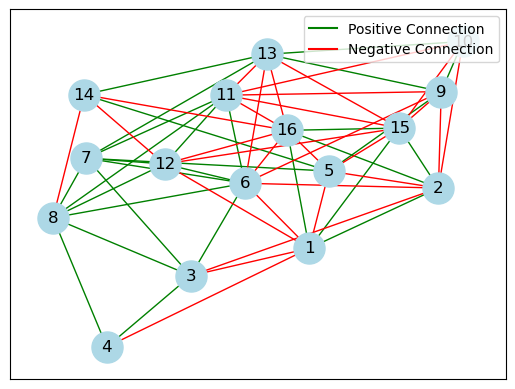

In [8]:

# Read data from the txt file
file_path = r"/Users/mac/Desktop/Desktop/RCS_Signed_Graph/Meeting_1/graph_test_files/Highland.txt"



edges = []
with open(file_path, "r") as file:
    for line in file:
        #u, v, sign = map(int, line.strip().split("\t"))
        u, v, sign = map(int, re.split(r'\t|\s+', line.strip()))
        edges.append((u, v, {'sign': sign}))

# Create a signed graph
signed_graph = nx.Graph()
signed_graph.add_edges_from(edges)

# Visualization
pos = nx.spring_layout(signed_graph)
positive_edges = [(u, v) for u, v, data in signed_graph.edges(data=True) if data['sign'] == 1]
negative_edges = [(u, v) for u, v, data in signed_graph.edges(data=True) if data['sign'] == -1]

nx.draw_networkx_nodes(signed_graph, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(signed_graph, pos, edgelist=positive_edges, edge_color='green')
nx.draw_networkx_edges(signed_graph, pos, edgelist=negative_edges, edge_color='red')
nx.draw_networkx_labels(signed_graph, pos, font_size=12, font_color='black')

plt.plot([0], color='green', label='Positive Connection')
plt.plot([0], color='red', label='Negative Connection')

# Adding legend
plt.legend(loc='upper right')

plt.show()


4-balanced graphs:
    To display 4-balanced graphs, we first need to generate or obtain a 4-balanced graph and then visualize it using a graph visualization library. NetworkX is a suitable library for working with graphs in Python. Here's how you can create and display a 4-balanced graph using NetworkX and Matplotlib:

A graph is considered 4-balanced if it satisfies the following property: For every cycle (closed loop) of length 4 in the graph, the sum of the signs of the edges along the cycle is even. In other words, there must be an even number of negative edges in every 4-cycle of the graph.

In [4]:
def find_pos_and_neg(graph):
    all_pos_node = []
    pos = dict()
    neg = dict()
    
    for node in graph:
        pos[node] = []
        neg[node] = []
        for nei, sign in graph[node]:
            if sign == 1:
                pos[node].append(nei)
            else:
                neg[node].append(nei)
        
        for node in pos[node]:
            if node not in all_pos_node:
                all_pos_node.append(node)
    return all_pos_node, pos ,neg
        

def generate_cluster(all_pos_node, pos):
    clu = list(list())
    index = 0
    is_checks = True
    
    while is_checks:
        start_node = random.choice(all_pos_node)
        clu.append(pos[start_node])
        
        for value in clu[index]:
            if value in all_pos_node: 
                all_pos_node.remove(value) 
        
        for nodes in clu[index]:
            for value in pos[nodes]:
                if value not in clu[index]:
                    clu[index].append(value)
                    if value in all_pos_node: 
                        all_pos_node.remove(value)
                  
        if not all_pos_node:
            is_checks = False  
        index += 1     
    return clu, all_pos_node

def convert_graph_to_dict(G):
    # making graph_dict for further purpose
    graph_dict = {}
    for u, v, sign in G.edges(data="sign"):
        if u not in graph_dict:
            graph_dict[u] = []
        if v not in graph_dict:
            graph_dict[v] = []
        graph_dict[u].append((v, sign))
        graph_dict[v].append((u, sign))
    
    return graph_dict

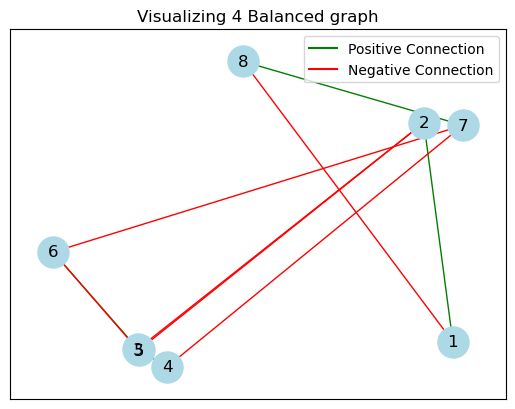

In [5]:
# Create a 4-balanced graph
four_balanced_graph = nx.Graph()

# Define edges with their signs (positive = 1, negative = -1)
edges = [
    (1, 2, {'weight': 1}),
    (2, 3, {'weight': -1}),
    (2, 5, {'weight': -1}),
    (1, 8, {'weight': -1}),
    (3, 4, {'weight': 1}),
    (3, 6, {'weight': -1}),
    (4, 7, {'weight': -1}),
    (5, 6, {'weight': 1}),
    (6, 7, {'weight': -1}),
    (7, 8, {'weight': 1})
]


four_balanced_graph.add_edges_from(edges)

# Visualization
pos = nx.spring_layout(four_balanced_graph)
positive_edges = [(u, v) for u, v, data in four_balanced_graph.edges(data=True) if data['weight'] == 1]
negative_edges = [(u, v) for u, v, data in four_balanced_graph.edges(data=True) if data['weight'] == -1]

nx.draw_networkx_nodes(four_balanced_graph, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(four_balanced_graph, pos, edgelist=positive_edges, edge_color='green', width=1)
nx.draw_networkx_edges(four_balanced_graph, pos, edgelist=negative_edges, edge_color='red', width=1)
nx.draw_networkx_labels(four_balanced_graph, pos, font_size=12, font_color='black')


plt.plot([0], color='green', label='Positive Connection')
plt.plot([0], color='red', label='Negative Connection')

# Adding legend
plt.legend(loc='upper right')

plt.title("Visualizing 4 Balanced graph")
plt.show()


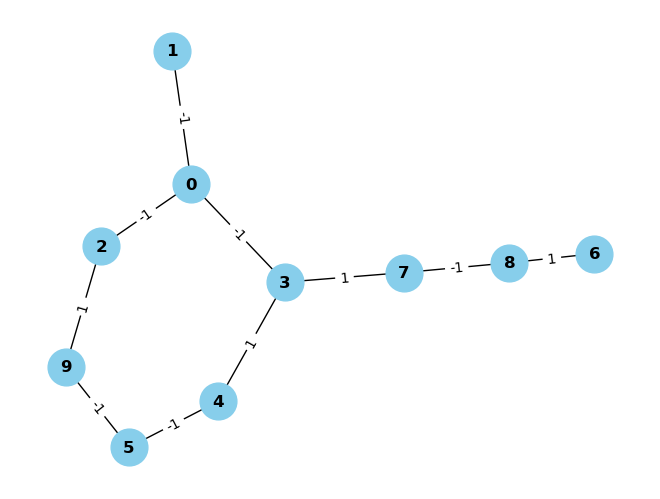

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

def generate_balanced_graph(cluster_sizes, link_probabilities):
    G = nx.Graph()

    # Add nodes to clusters
    nodes = []
    for cluster_size in cluster_sizes:
        cluster_nodes = range(len(nodes), len(nodes) + cluster_size)
        nodes.extend(cluster_nodes)
        G.add_nodes_from(cluster_nodes)

    # Add links with specified probabilities
    for pair in combinations(nodes, 2):
        if pair[0] // cluster_sizes[0] == pair[1] // cluster_sizes[0]:
            # Nodes in the same cluster
            link_probability = link_probabilities[0]
        else:
            # Nodes in different clusters
            link_probability = link_probabilities[1]

        if np.random.rand() < link_probability:
            G.add_edge(pair[0], pair[1], sign=np.random.choice([-1, 1]))

    return G

def visualize_graph(graph):
    pos = nx.spring_layout(graph)  # You can experiment with different layouts

    edge_labels = {(i, j): G[i][j]['sign'] for i, j in G.edges()}
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    
    plt.show()

# Example usage
cluster_sizes = [3, 3, 4]  # Define the size of each cluster
link_probabilities = [0.8, 0.2]  # Define link probabilities within and between clusters

G = generate_balanced_graph(cluster_sizes, link_probabilities)
visualize_graph(G)